<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Rice-Mele Model__

## _(1D Topological Insulator)_


## The Rice-Mele Model

The **Rice-Mele model** is a one-dimensional fermionic model derived from the SSH model by adding a **staggered on-site potential**. It is a paradigmatic example of a **driven topological system** and is widely used to study **adiabatic pumping**, **topological edge states**, and **fermion parity flips**.

The Hamiltonian for a chain of $ N $ unit cells is:

$$ \boxed{
\hat{H} = t_1 \sum_{n=1}^{N} \left( |n_B\rangle \langle n_A| + \text{h.c.} \right) 
+ t_2 \sum_{n=1}^{N-1} \left( |(n+1)_A\rangle \langle n_B| + \text{h.c.} \right) 
+ t_0 \sum_{n=1}^{N} \left( |n_A\rangle \langle n_A| - |n_B\rangle \langle n_B| \right)}
$$

where:
- $ t_1 $: **intracell hopping amplitude** (within unit cell $ n $)
- $ t_2 $: **intercell hopping amplitude** (between unit cells $ n $ and $ n+1 $)
- $ t_0 $: **staggered onsite potential** — breaks sublattice symmetry unless $ t_0 = 0 $
- $ |n_A\rangle $, $ |n_B\rangle $: basis states on sublattices $ A $ and $ B $ in unit cell $ n $

This model reduces to the **SSH model** when $ t_0 = 0 $.  
When $ t_0 \ne 0 $, **chiral (sublattice) symmetry is broken**, and the topological protection of edge states is lost unless $ t_0 $ is small.

![SSH](SSH.png)

For a chain with $ N = 4 $ unit cells (8 sites total), the Hamiltonian matrix in the ordered basis is:

$$
H =
\begin{pmatrix}
 t_0 & t_1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 t_1 & -t_0 & t_2 & 0 & 0 & 0 & 0 & 0 \\
 0 & t_2 & t_0 & t_1 & 0 & 0 & 0 & 0 \\
 0 & 0 & t_1 & -t_0 & t_2 & 0 & 0 & 0 \\
 0 & 0 & 0 & t_2 & t_0 & t_1 & 0 & 0 \\
 0 & 0 & 0 & 0 & t_1 & -t_0 & t_2 & 0 \\
 0 & 0 & 0 & 0 & 0 & t_2 & t_0 & t_1 \\
 0 & 0 & 0 & 0 & 0 & 0 & t_1 & -t0
\end{pmatrix}
$$


Key Features

- **Diagonal entries**: Alternating $ +t_0 $ (on $ A $ sites) and $ -t_0 $ (on $ B $ sites)
- **Off-diagonal entries**:
  - $ t_1 $: couples $ A_n \leftrightarrow B_n $ (intra-cell)
  - $ t_2 $: couples $ B_n \leftrightarrow A_{n+1} $ (inter-cell)
- **Chiral symmetry**: Present only if $ t_0 = 0 $
- **Topological phases**: For $ t_0 = 0 $, the system behaves like SSH:
  - $ t_1 < t_2 $: topological ($ \nu = 1 $), supports edge states
  - $ t_1 > t_2 $: trivial ($ \nu = 0 $)
- **With $ t_0 \ne 0 $**: Gap remains open, but winding number undefined; edge states shift away from zero energy


In [1]:
# Main Library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

In [2]:
# Parameters
N = 20  # Number of unit cells
t1 = 0.5    # Intracell hopping
t2 = 1    # Intercell hopping (topological if t2 > t1)
t0 = 0.2     # Staggered potential

# Total number of sites
M = 2 * N 

In [3]:
# Initialize Hamiltonian matrix
H = np.zeros((M, M))

# Build the Hamiltonian
for n in range(N):
    i_A = 2 * n        # index of A site in cell n (0-based)
    i_B = 2 * n + 1    # index of B site in cell n

    # On-site energies
    H[i_A, i_A] = t0
    H[i_B, i_B] = -t0

    # Intracell hopping: A_n <-> B_n
    H[i_A, i_B] = t1
    H[i_B, i_A] = t1  # h.c.

    # Intercell hopping: B_n <-> A_{n+1} (only if not last cell)
    if n < N - 1:
        i_next_A = 2 * (n + 1)        # A site of next cell
        H[i_B, i_next_A] = t2
        H[i_next_A, i_B] = t2  # h.c.

# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

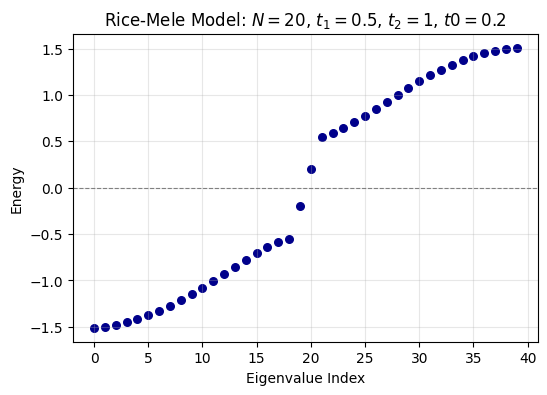

In [4]:
# Plot energy spectrum
plt.figure(figsize=(6, 4))
plt.scatter(range(M), eigenvalues, color='darkblue', s=30)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy')
plt.title(f'Rice-Mele Model: $N={N}$, $t_1={t1}$, $t_2={t2}$, $t0={t0}$')
plt.grid(True, alpha=0.3)
plt.show()

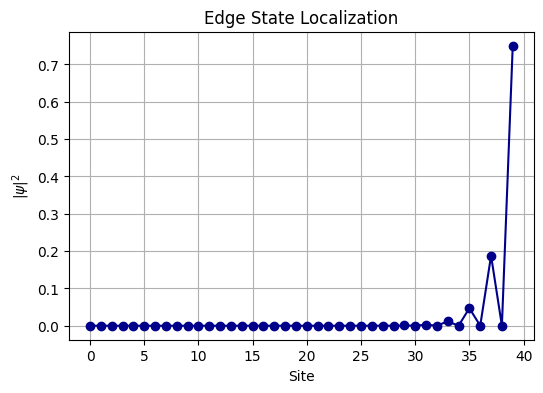

In [5]:
# Find index of eigenvalue closest to 0
idx_zero = np.argmin(np.abs(eigenvalues))
edge_state = eigenvectors[:, idx_zero]

# Plot amplitude
plt.figure(figsize=(6, 4))
plt.plot(np.abs(edge_state)**2, 'o-', color='darkblue')
plt.xlabel('Site')
plt.ylabel(r'$|\psi|^2$')
plt.title('Edge State Localization')
plt.grid(True)
plt.show()

Text(0, 0.5, '$|\\psi|^2$')

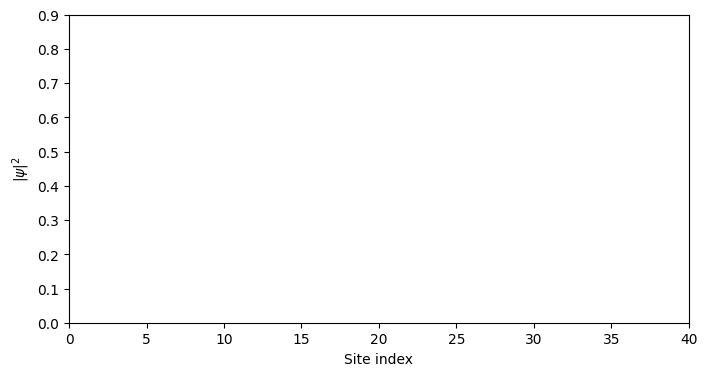

In [6]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], 'o-', color='darkblue')
title = ax.set_title("")
ax.set_xlim(-0.01, M)
ax.set_ylim(0, 0.9)
ax.set_xlabel("Site index")
ax.set_ylabel(r'$|\psi|^2$')

In [7]:
# Initialization function
def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

# Animation function
def animate(i):
    psi = eigenvectors[:, i]
    # Compute probability density |ψ_n(i)|^2 for each site i
    prob_density = np.abs(psi)**2
    line.set_data(np.arange(M), prob_density)
    title.set_text(f"Eigenstate {i+1}, Energy = {eigenvalues[i]:.3f}")
    return line, title

In [8]:
# Create animation
ani = FuncAnimation(fig, animate, frames=M, init_func=init,
                    blit=True, interval=300, repeat=False)

# Save animation as GIF
ani.save('RM_Eigenvectors.gif', writer='pillow', fps=2)

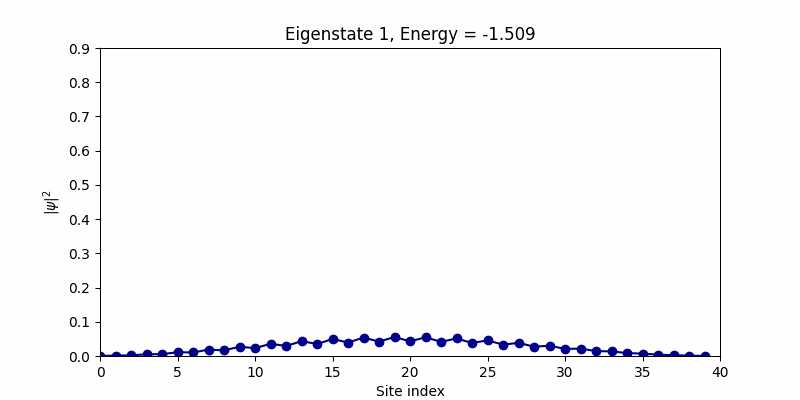

In [9]:
# Display GIF inline
Image(filename='RM_Eigenvectors.gif')

In [10]:
# Parameters for each plot
t1_values = np.linspace(0.0, 2.5, 100)
t2_values = np.linspace(0.0, 2.5, 100)
t0_values = np.linspace(-1.0, 1.0, 100)  # Staggered potential

# Storage for eigenvalues
eigs_vs_t1 = []
eigs_vs_t2 = []
eigs_vs_t0 = []


# Compute E vs t1 (t2 fixed)
for t1 in t1_values:
    H = np.zeros((M, M))
    for i in range(N):
        # On-site: zero for now (u=0 in this sweep)
        H[2*i, 2*i] = t0      # A site
        H[2*i+1, 2*i+1] = -t0  # B site
        # Intracell hopping: A_i <-> B_i
        H[2*i, 2*i+1] = t1
        H[2*i+1, 2*i] = t1
    for i in range(N - 1):
        # Intercell hopping: B_i <-> A_{i+1}
        H[2*i+1, 2*i+2] = t2
        H[2*i+2, 2*i+1] = t2
    eigvals = np.linalg.eigvalsh(H)
    eigs_vs_t1.append(eigvals)

# Compute E vs t2 (t1 fixed)
for t2 in t2_values:
    H = np.zeros((M, M))
    for i in range(N):
        H[2*i, 2*i] = t0
        H[2*i+1, 2*i+1] = -t0
        H[2*i, 2*i+1] = t1
        H[2*i+1, 2*i] = t1
    for i in range(N - 1):
        H[2*i+1, 2*i+2] = t2
        H[2*i+2, 2*i+1] = t2
    eigvals = np.linalg.eigvalsh(H)
    eigs_vs_t2.append(eigvals)

# Compute E vs t0 (t1 and t2 fixed)
for t0 in t0_values:
    H = np.zeros((M, M))
    for i in range(N):
        # Staggered onsite potential: +t0 on A, -t0 on B
        H[2*i, 2*i] = t0      # A site
        H[2*i+1, 2*i+1] = -t0 # B site
        H[2*i, 2*i+1] = t1  # t1 fixed
        H[2*i+1, 2*i] = t1
    for i in range(N - 1):
        H[2*i+1, 2*i+2] = t2  # t2 fixed
        H[2*i+2, 2*i+1] = t2
    eigvals = np.linalg.eigvalsh(H)
    eigs_vs_t0.append(eigvals)

# Convert to arrays (each row is a state, each column a parameter step)
eigs_vs_t1 = np.array(eigs_vs_t1).T
eigs_vs_t2 = np.array(eigs_vs_t2).T
eigs_vs_t0 = np.array(eigs_vs_t0).T


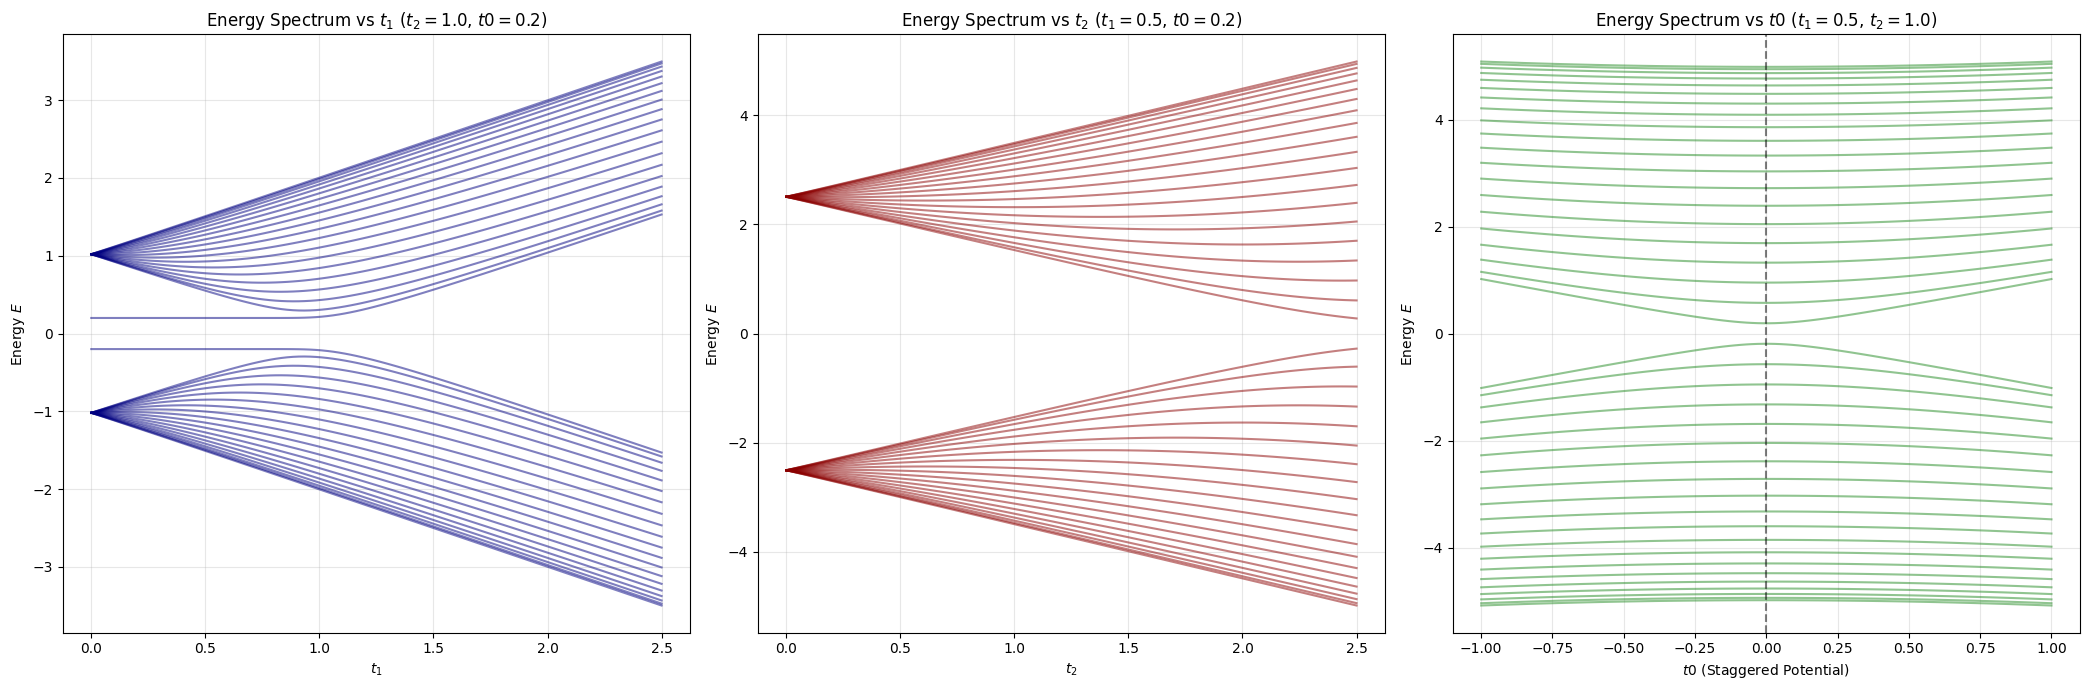

In [11]:
# Plots
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Plot 1: E vs t1
for eig in eigs_vs_t1:
    axs[0].plot(t1_values, eig, color='navy', alpha=0.5)
axs[0].set_title(r'Energy Spectrum vs $t_1$ ($t_2=1.0$, $t0=0.2$)')
axs[0].set_xlabel(r'$t_1$')
axs[0].set_ylabel(r'Energy $E$')
axs[0].grid(True, alpha=0.3)

# Plot 2: E vs t2
for eig in eigs_vs_t2:
    axs[1].plot(t2_values, eig, color='darkred', alpha=0.5)
axs[1].set_title(r'Energy Spectrum vs $t_2$ ($t_1=0.5$, $t0=0.2$)')
axs[1].set_xlabel(r'$t_2$')
axs[1].set_ylabel(r'Energy $E$')
axs[1].grid(True, alpha=0.3)

# Plot 3: E vs t0
for eig in eigs_vs_t0:
    axs[2].plot(t0_values, eig, color='forestgreen', alpha=0.5)
axs[2].set_title(r'Energy Spectrum vs $t0$ ($t_1=0.5$, $t_2=1.0$)')
axs[2].set_xlabel(r'$t0$ (Staggered Potential)')
axs[2].set_ylabel(r'Energy $E$')
axs[2].axvline(0, color='k', linestyle='--', alpha=0.5)  # Mark t0=0
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## Polarization

### Polarization in the SSH Model

In one-dimensional insulators, the electronic polarization can be formulated as a **geometric phase** accumulated by the Bloch eigenstates as the crystal momentum $k$ traverses the Brillouin zone.

For a single occupied band, we define the **Berry connection** as:

$$
\mathcal{A}(k) = i \langle u_k | \partial_k u_k \rangle,
$$

where $|u_k\rangle$ is the periodic part of the Bloch eigenstate.

In the SSH model, it can be shown analytically that:

$$
\mathcal{A}(k) = i \langle \psi_-(k) | \partial_k \psi_-(k) \rangle = -\frac{1}{2} \frac{d\phi(k)}{dk},
$$

with:

$$
\phi(k) = \tan^{-1} \left( \frac{t_2 \sin(ka)}{t_1 + t_2 \cos(ka)} \right).
$$


### Macroscopic Polarization

The macroscopic polarization $P$, according to the modern theory of polarization, is:

$$
P = -\frac{e}{2\pi} \oint_{\text{BZ}} \mathcal{A}(k)\, dk = \frac{e}{4\pi} \oint_{\text{BZ}} \frac{d\phi(k)}{dk}\, dk.
$$

This reduces to:

$$
P = \frac{e}{4\pi} \Delta \phi(k) \quad \text{over one Brillouin zone}.
$$

To understand the winding of $\phi(k)$, consider the **Bloch vector** ($\mathbf{d}(k)$):

$$
\mathbf{d}(k) = \begin{pmatrix}
d_x(k) \\
d_y(k)
\end{pmatrix}
= \begin{pmatrix}
t_1 + t_2 \cos(ka) \\
t_2 \sin(ka)
\end{pmatrix}.
$$

The **polar angle** of $\mathbf{d}(k)$ is exactly $\phi(k)$. Plotting the trajectory of $\mathbf{d}(k)$ in the $d_x$-$d_y$ plane over $k \in [-\pi/a, \pi/a]$, we find:

* When $t_1 > t_2$ (trivial phase), $\mathbf{d}(k)$ does **not** encircle the origin → $\Delta \phi(k) = 0 \Rightarrow P = 0$.
* When $t_1 < t_2$ (topological phase), $\mathbf{d}(k)$ **encircles** the origin once → $\Delta \phi(k) = 2\pi \Rightarrow P = \frac{e}{2} \pmod{e}$.

$$
P = 
\begin{cases} 
-\frac{e}{2} & \text{if } t_1 < t_2, \\ 
0 & \text{if } t_1 > t_2. 
\end{cases}
$$

<p align="center">
  <img src="phi.png" alt="phi" width="400"/>
</p>

In [12]:
# Grid parameters
num_k = 100
ks = np.linspace(-np.pi, np.pi, num_k, endpoint=False)
deltas = np.linspace(-2, 2, 50)
polarizations_band1 = []
polarizations_band2 = []

In [13]:
# Loop over Δt values and compute polarization
for delta in deltas:
    t1 = 1 + delta
    t2 = 1 - delta

    berry_phases = [0.0, 0.0]  # For both bands

    for i in range(len(ks)):
        k = ks[i]
        kp = ks[(i + 1) % len(ks)]

        # Bloch Hamiltonians
        h_k = np.array([[0, t1 + t2 * np.exp(-1j * k)],
                        [t1 + t2 * np.exp(1j * k), 0]])
        
        h_kp = np.array([[0, t1 + t2 * np.exp(-1j * kp)],
                         [t1 + t2 * np.exp(1j * kp), 0]])

        # Eigenstates
        _, vec_k = np.linalg.eigh(h_k)
        _, vec_kp = np.linalg.eigh(h_kp)

        for band in [0, 1]:  # lower and upper band
            u_k = vec_k[:, band]
            u_kp = vec_kp[:, band]
            berry_phases[band] += np.angle(np.vdot(u_k, u_kp))

    P1 = -berry_phases[0] / (2 * np.pi)
    P2 = -berry_phases[1] / (2 * np.pi)

    polarizations_band1.append(P1)
    polarizations_band2.append(P2)

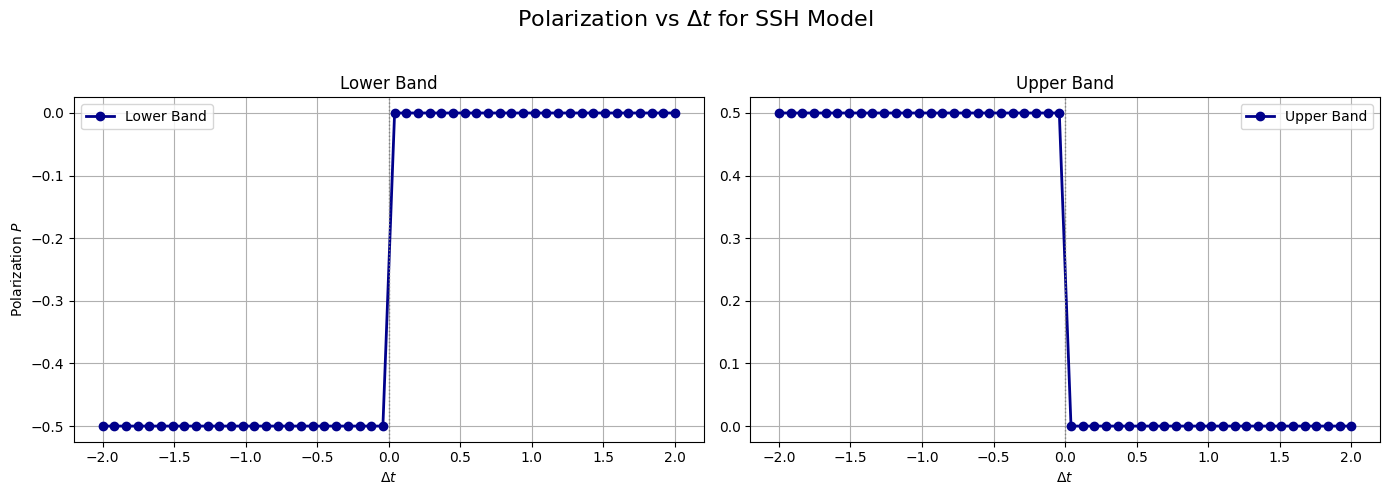

In [14]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Lower band polarization
axes[0].plot(deltas, polarizations_band1, 'o-', color='darkblue', lw=2, label="Lower Band")
axes[0].axvline(0, color='gray', ls=':', lw=1)
axes[0].set_xlabel(r'$\Delta t$')
axes[0].set_ylabel('Polarization $P$')
axes[0].set_title('Lower Band')
axes[0].legend()
axes[0].grid(True)

# Upper band polarization
axes[1].plot(deltas, polarizations_band2, 'o-', color='darkblue', lw=2, label="Upper Band")
axes[1].axvline(0, color='gray', ls=':', lw=1)
axes[1].set_xlabel(r'$\Delta t$')
axes[1].set_title('Upper Band')
axes[1].legend()
axes[1].grid(True)

plt.suptitle(r'Polarization vs $\Delta t$ for SSH Model', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


---